In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from datetime import datetime
custom = datetime.today().strftime('%Y-%m-%d_%H.%M')
filename="_"+custom+"_"

from nltk.corpus import stopwords
STOPWORDS = stopwords.words('indonesian')

from PIL import Image
import numpy as np

In [69]:
import pandas as pd
data = pd.read_excel(r'Data_Berita\IndoLEM_Sentimen.xlsx')
data

,created,site,link,fulltext,summary,title,topic,Nama Calon,Sentimen,Polarity
0,2023-06-11 23:04:58,kompas.tv,https://www.kompas.tv/video/415327/puan-sebut-...,"Minggu, 11 Juni 2023 | 22:56 WIB\n\nJAKARTA, K...","Minggu, 11 Juni 2023 | 22:56 WIBJAKARTA, KOMPA...",Puan Sebut Cak Imin Masuk Bursa Bakal Cawapres...,Politik,Ganjar,neutral,98.059
1,2023-06-11 22:32:25,antaranews.com,https://www.antaranews.com/berita/3583044/anie...,"Kalau kurang geser sedikit, ambil rutenya kemu...","""Alhamdulillah perjalanan kita sudah panjang d...",Anies Baswedan: Pemilu bukan soal meneruskan y...,Politik,Anies,neutral,96.476
2,2023-06-11 22:32:19,antaranews.com,https://bengkulu.antaranews.com/berita/291453/...,Mahfud MD tolak tawaran jadi cawapres Anies Ba...,Mahfud MD tolak tawaran jadi cawapres Anies Ba...,Mahfud MD tolak tawaran jadi cawapres Anies Ba...,Politik,Anies,neutral,98.520
3,2023-06-11 22:32:18,antaranews.com,https://manado.antaranews.com/berita/228678/pe...,"""Jadi kemerdekaan kita, sebagai negara, dalam ...","""Jadi kalau ada Pemilu, ini bukan soal menerus...","Pemilu bukan soal meneruskan yang kemarin, kat...",Politik,Anies,neutral,93.269
4,2023-06-11 22:21:18,antaranews.com,https://www.antaranews.com/berita/3583029/lsn-...,bakal calon presiden (capres) dari PDI Perjuan...,bakal calon presiden (capres) dari PDI Perjuan...,LSN: Prabowo raih elektabilitas tertinggi sebe...,Politik,Prabowo,neutral,96.459
...,...,...,...,...,...,...,...,...,...,...
14428,2023-06-25 12:15:06,kompas.tv,https://www.kompas.tv/video/419663/dipuji-prab...,"Minggu, 25 Juni 2023 | 12:10 WIB\n\nSOLO, KOMP...","Minggu, 25 Juni 2023 | 12:10 WIBSOLO, KOMPAS.T...","Dipuji Prabowo sebagai Pemimpin Masa Depan, Gi...",Politik,Prabowo,neutral,64.025
14429,2023-06-25 11:39:24,detik.com,https://news.detik.com/pemilu/d-6791300/gerind...,Ketua DPP Partai Gerindra DKI Jakarta Ahmad Ri...,Ketua DPP Partai Gerindra DKI Jakarta Ahmad Ri...,Gerindra Ajak Kader di Jakut Menangkan Prabowo...,Politik,Prabowo,negative,84.191
14430,2023-06-25 11:27:48,detik.com,https://news.detik.com/pemilu/d-6791300/riza-d...,Ketua DPP Partai Gerindra DKI Jakarta Ahmad Ri...,Ketua DPP Partai Gerindra DKI Jakarta Ahmad Ri...,Riza di Depan Kader Gerindra: Menangkan Prabow...,Politik,Prabowo,neutral,90.706
14431,2023-06-25 11:05:15,tribunnews.com,https://manado.tribunnews.com/2023/06/25/reaks...,Prabowo Subianto kembali bertemu dengan Wali K...,Prabowo Subianto kembali bertemu dengan Wali K...,Reaksi Gibran Saat Dipuji Prabowo Subianto Seb...,Politik,Prabowo,neutral,64.716


In [70]:
df = pd.DataFrame(data, columns=['created', 'Nama Calon','Sentimen'])
df

,created,Nama Calon,Sentimen
0,2023-06-11 23:04:58,Ganjar,neutral
1,2023-06-11 22:32:25,Anies,neutral
2,2023-06-11 22:32:19,Anies,neutral
3,2023-06-11 22:32:18,Anies,neutral
4,2023-06-11 22:21:18,Prabowo,neutral
...,...,...,...
14428,2023-06-25 12:15:06,Prabowo,neutral
14429,2023-06-25 11:39:24,Prabowo,negative
14430,2023-06-25 11:27:48,Prabowo,neutral
14431,2023-06-25 11:05:15,Prabowo,neutral


#### Per Hari

In [71]:
#copy df ke df2
df2 = df.copy()

In [85]:
df2['Datetime'] = pd.to_datetime(df2['created'])
df2_count = df2.groupby([df2['Datetime'].dt.date, 'Nama Calon','Sentimen']).size().reset_index(name='Count')
df2_count

,Datetime,Nama Calon,Sentimen,Count
0,2023-05-01,Anies,neutral,44
1,2023-05-01,Ganjar,negative,10
2,2023-05-01,Ganjar,neutral,189
3,2023-05-01,Ganjar,positive,1
4,2023-05-01,Prabowo,negative,11
...,...,...,...,...
414,2023-06-30,Anies,positive,1
415,2023-06-30,Ganjar,neutral,47
416,2023-06-30,Prabowo,negative,22
417,2023-06-30,Prabowo,neutral,64


In [86]:
df2_count['Datetime'] = pd.to_datetime(df2_count['Datetime'])
df2_count['Day'] = df2_count['Datetime'].dt.day
df2_count['Month'] = df2_count['Datetime'].dt.month
df2_count = df2_count.rename(columns={'Count': 'Berita'})
df2_count


,Datetime,Nama Calon,Sentimen,Berita,Day,Month
0,2023-05-01,Anies,neutral,44,1,5
1,2023-05-01,Ganjar,negative,10,1,5
2,2023-05-01,Ganjar,neutral,189,1,5
3,2023-05-01,Ganjar,positive,1,1,5
4,2023-05-01,Prabowo,negative,11,1,5
...,...,...,...,...,...,...
414,2023-06-30,Anies,positive,1,30,6
415,2023-06-30,Ganjar,neutral,47,30,6
416,2023-06-30,Prabowo,negative,22,30,6
417,2023-06-30,Prabowo,neutral,64,30,6


In [87]:
df2_count['Day'] = df2_count['Day'].apply(str)
df2_count['Month'] = df2_count['Month'].apply(str)
df2_count['DDMM'] = df2_count['Day'] + '-' + df2_count['Month']
df2_count

,Datetime,Nama Calon,Sentimen,Berita,Day,Month,DDMM
0,2023-05-01,Anies,neutral,44,1,5,1-5
1,2023-05-01,Ganjar,negative,10,1,5,1-5
2,2023-05-01,Ganjar,neutral,189,1,5,1-5
3,2023-05-01,Ganjar,positive,1,1,5,1-5
4,2023-05-01,Prabowo,negative,11,1,5,1-5
...,...,...,...,...,...,...,...
414,2023-06-30,Anies,positive,1,30,6,30-6
415,2023-06-30,Ganjar,neutral,47,30,6,30-6
416,2023-06-30,Prabowo,negative,22,30,6,30-6
417,2023-06-30,Prabowo,neutral,64,30,6,30-6


In [88]:
#copy df2_count
df2_count_backup = df2_count.copy()

In [89]:
#hanya ambil data di bulan mei dan hilangkan sentimen neutral
df2_count = df2_count_backup[df2_count_backup['Month'] == '5']
# df2_count = df2_count[df2_count['Sentimen'] != 'neutral']
df2_count

,Datetime,Nama Calon,Sentimen,Berita,Day,Month,DDMM
0,2023-05-01,Anies,neutral,44,1,5,1-5
1,2023-05-01,Ganjar,negative,10,1,5,1-5
2,2023-05-01,Ganjar,neutral,189,1,5,1-5
3,2023-05-01,Ganjar,positive,1,1,5,1-5
4,2023-05-01,Prabowo,negative,11,1,5,1-5
...,...,...,...,...,...,...,...
236,2023-05-31,Ganjar,neutral,50,31,5,31-5
237,2023-05-31,Ganjar,positive,1,31,5,31-5
238,2023-05-31,Prabowo,negative,3,31,5,31-5
239,2023-05-31,Prabowo,neutral,41,31,5,31-5


In [ ]:
pip install seaborn

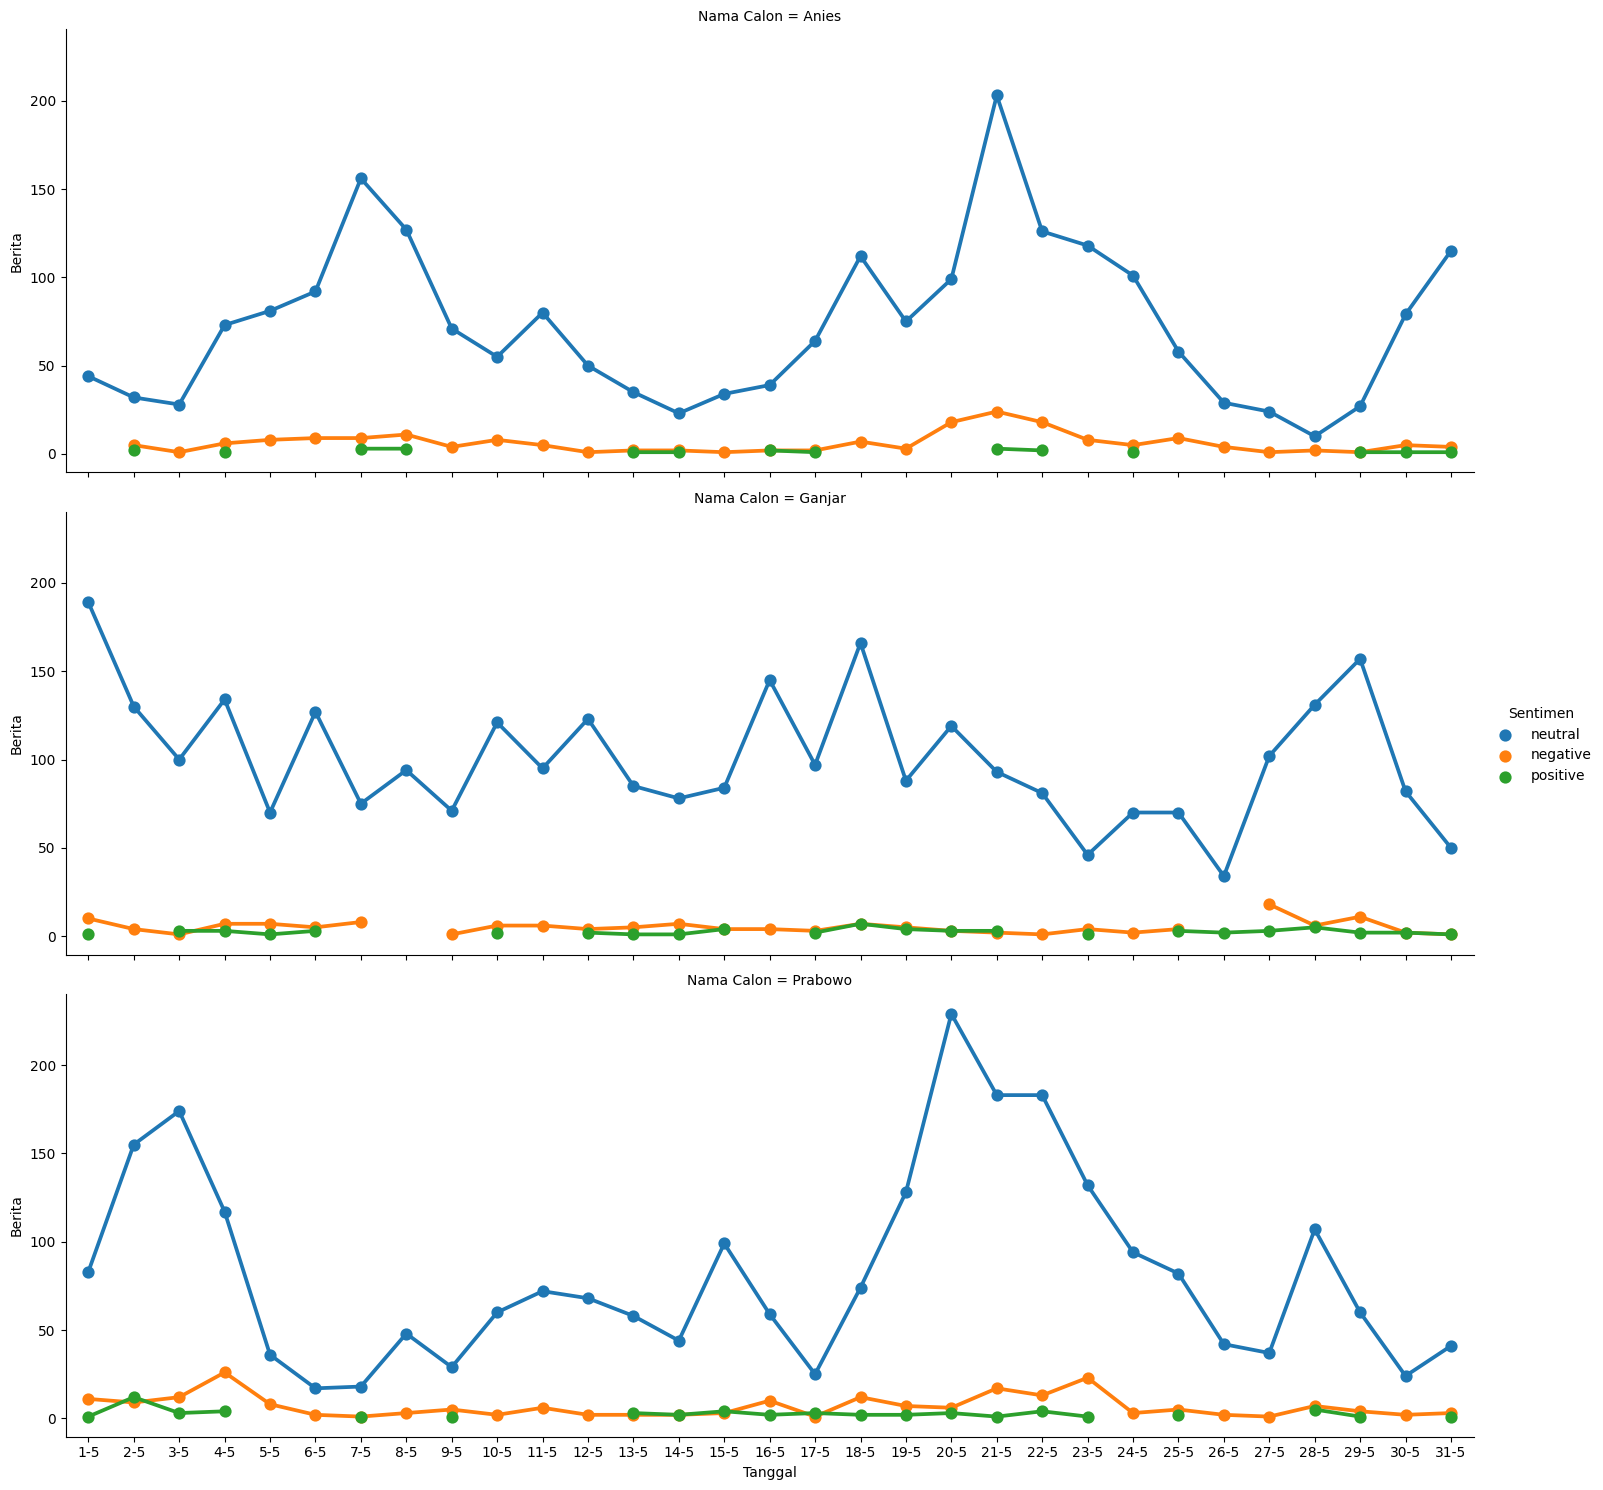

In [90]:
import seaborn as sns

dtt = datetime.today().strftime('%Y-%m-%d_%H.%M')
colors = ['#1F77B4', '#FF7F0E', '#2CA02C']
custom_palette = ['#FF0000', '#00FF00', '#0000FF']
sns.catplot(kind="point", x="DDMM", y="Berita", hue="Sentimen", col="Nama Calon", palette=colors,
            data=df2_count, col_wrap=1, aspect=3)
#plt.title('Multiple Line Chart Example')
plt.xlabel('Tanggal')
#wc.to_file("data_save/ganjar_neg_" + dtt + "_wc.png")
# plt.savefig("data_save/lineplot_" + dtt + "_.png")
#plt.ylabel('Tweet')
plt.show()

In [45]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [46]:
bad_words = [
    'username',
    'indonesia',
    'halodoc',
    'telkomsel'
]

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'[^a-zA-Z]', ' ', text)

    text = text.lower()

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('indonesian'))
    tokens = [token for token in tokens if token not in stop_words and len(token) >= 4 and token not in bad_words]

    cleaned_text = ' '.join(tokens)

    return cleaned_text

def get_top_words(text, n=10):
    tokens = text.split()

    word_counts = Counter(tokens)

    total_words = sum(word_counts.values())

    top_words = word_counts.most_common(n)

    top_words_percent = [(word, count / total_words * 100) for word, count in top_words]

    return top_words, top_words_percent

def clean_join(text):
    cleaned_list = ['' if pd.isnull(item) else str(item) for item in text]

    return ' '.join(cleaned_list)

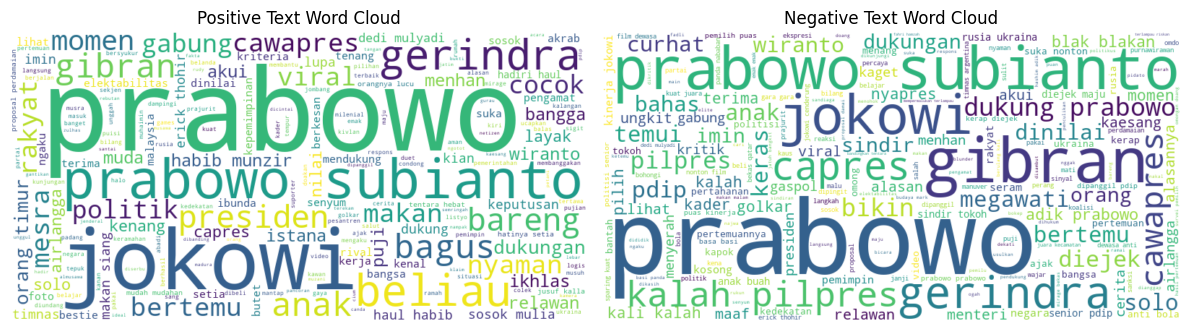

In [91]:
#buat list positif yang merupakan data yang sentimennya positif dengan nama calon adalah anies
# positif = df2_count[(df2_count['Sentimen'] == 'positive') & (df2_count['Nama Calon'] == 'anies')]

positive_data = data[(data['Sentimen'] == 'positive') & (data['Nama Calon'] == 'Prabowo')]
negative_data = data[(data['Sentimen'] == 'negative') & (data['Nama Calon'] == 'Prabowo')]

positive_text = clean_join(positive_data['title'])
negative_text = clean_join(negative_data['title'])

positive_text = preprocess_text(positive_text)
negative_text = preprocess_text(negative_text)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Text Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Text Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [92]:
#tampilkan dalam bentuk tabel, 10 kata teratas dari kolom title pada positive_data
top_words, top_words_percent = get_top_words(negative_text, n=10)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Count'])
top_words_df['Percent'] = [f'{percent:.2f}%' for _, percent in top_words_percent]
top_words_df


,Word,Count,Percent
0,prabowo,340,13.08%
1,gibran,54,2.08%
2,jokowi,54,2.08%
3,subianto,51,1.96%
4,kalah,34,1.31%
5,pilpres,31,1.19%
6,gerindra,28,1.08%
7,pdip,23,0.88%
8,diejek,23,0.88%
9,capres,22,0.85%
